<a href="https://colab.research.google.com/github/SamuelFI566/SIAFI_Proyecto_Final/blob/main/Proyecto_SIAFI_Ejercicio_1/Proyecto_SIAFI_Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade scikit-learn


RMSE: 267331938.96789712


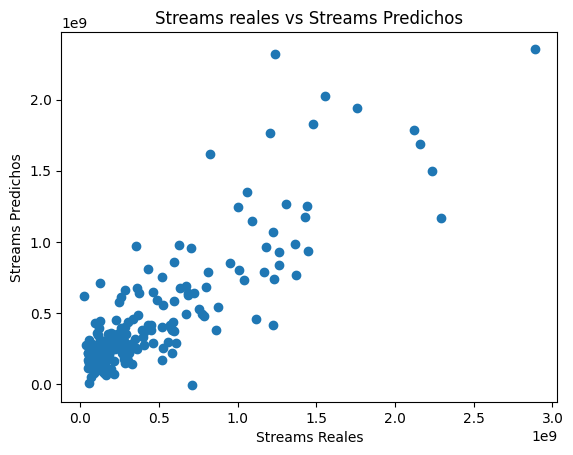

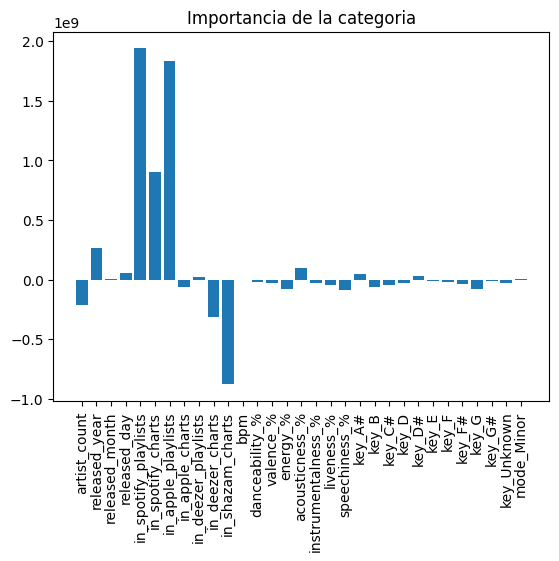

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Carga del dataset
data = pd.read_csv("spotify-2023.csv", encoding="latin1")

# Eliminar duplicados
data = data.drop_duplicates()

# Manejar valores faltantes y cubrir posibles errores de tipo de dato
data['streams'] = data['streams'].astype(str).str.replace(',', '').str.strip()  # Limpiar comas y espacios
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')  # Convertir a dato numérico
data = data.dropna(subset=['streams'])  # Eliminar filas con valores NaN en 'streams'
data['key'] = data['key'].fillna('Unknown')  # Rellenar los valores desconocidos de 'key' con un valor categórico
data = data.fillna(0)  # Reemplazar valores faltantes en otras columnas con 0

# Seleccionar columnas relevantes del dataset
numerical_features = [
    'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists',
    'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
    'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]
categorical_features = ['key', 'mode']

# Convertir columnas numéricas a float eliminando comas y espacios
for col in numerical_features:
    data[col] = data[col].astype(str).str.replace(',', '').str.strip()
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convertir a número, NaN si falla

# Manejar valores faltantes si los hay
data = data.dropna(subset=numerical_features)

# Escalar las características numéricas
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Transformar variables categóricas en dummies
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Separar variables independientes y dependiente
X = data.drop(['streams', 'track_name', 'artist(s)_name'], axis=1)
y = data['streams']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Comparar valores reales vs predichos
plt.scatter(y_test, y_pred)
plt.xlabel("Streams Reales")
plt.ylabel("Streams Predichos")
plt.title("Streams reales vs Streams Predichos")
plt.show()

# Importancia de las variables
importance = model.coef_
plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.title("Importancia de la categoria")
plt.show()




Las gráficas generadas muestran que el modelo tiene dificultades para predecir con precisión, los puntos en la gráfica de streams reales versus predichos están dispersos, lo que indica un ajuste insuficiente del modelo, ademas, la gráfica de importancia de variables indica que características como la fecha de lanzamiento y la inclusión en ciertas playlists tienen mayor impacto en las predicciones de los streams, cuando en principio, la fecha de lazamiento no deberia de tener un gran impacto en la cantidad de streams sin tener informacion extra sobre las epocas o fechas en las que suele haber mas actividad o reproducciones acorde a un genero de musica, arttista, etc.

En general, el programa cumple parcialmente su objetivo de predecir los streams acumulados de canciones, pero su desempeño es limitado debido a la simplificación de usar un modelo lineal y a la naturaleza compleja de la prediccion de la catidad de streams, pues se toman en cuenta muchas variables que en principio no parecieran tener relacion directa o lineal entre si.